<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/red_de_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10

La red CIFAR-10 se refiere a una arquitectura de red neuronal convolucional (CNN) diseñada para el conjunto de datos CIFAR-10. CIFAR-10 es un conjunto de datos ampliamente utilizado en el campo del aprendizaje automático y la visión por computadora, que consta de 60,000 imágenes en color de 32x32 píxeles, divididas en 10 clases diferentes, con 6,000 imágenes por clase.

La arquitectura de la red CIFAR-10 suele estar diseñada específicamente para manejar las características de las imágenes en el conjunto de datos CIFAR-10, que son de baja resolución pero contienen información suficiente para la clasificación precisa. Aunque hay varias variantes de arquitecturas que se pueden utilizar para este conjunto de datos, una arquitectura comúnmente utilizada es una versión simplificada de la arquitectura VGG, que consiste en bloques de convolución seguidos por capas completamente conectadas.

Aquí hay una descripción general de una posible arquitectura de red para CIFAR-10:

* **Capas de convolución**: Las primeras capas de la red consisten en varias capas de convolución seguidas por capas de activación ReLU. Estas capas se encargan de extraer características relevantes de las imágenes, como bordes, texturas y patrones simples.

* **Capas de agrupación (pooling)**: Después de algunas capas de convolución, se pueden agregar capas de agrupación para reducir la dimensionalidad de las características extraídas y mejorar la invariancia a pequeñas traslaciones y deformaciones en las imágenes.

* **Capas completamente conectadas:** Finalmente, las características extraídas se alimentan a través de una o varias capas completamente conectadas, seguidas por una capa de salida con activación softmax para la clasificación de las 10 clases.

* **Regularización y optimización**: Durante el entrenamiento, se pueden agregar técnicas de regularización, como la regularización L2 o la técnica de dropout, para evitar el sobreajuste del modelo. Además, se utiliza un optimizador como SGD (Stochastic Gradient Descent) o Adam para optimizar los parámetros de la red.

La arquitectura de la red CIFAR-10 se puede ajustar y optimizar mediante la experimentación con diferentes configuraciones de capas, hiperparámetros y técnicas de regularización para lograr un rendimiento óptimo en la clasificación de imágenes en el conjunto de datos CIFAR-10.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Cargar y preparar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


**En este ejemplo:**


* Cargamos el conjunto de datos CIFAR-10 y lo dividimos en conjuntos de entrenamiento y prueba.
* Definimos la arquitectura de la red CNN, que consiste en varias capas convolucionales y de agrupación seguidas por capas completamente conectadas.
* Compilamos el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica.
* Entrenamos el modelo en los datos de entrenamiento durante 10 épocas.
* Evaluamos el modelo en los datos de prueba para obtener su precisión final.



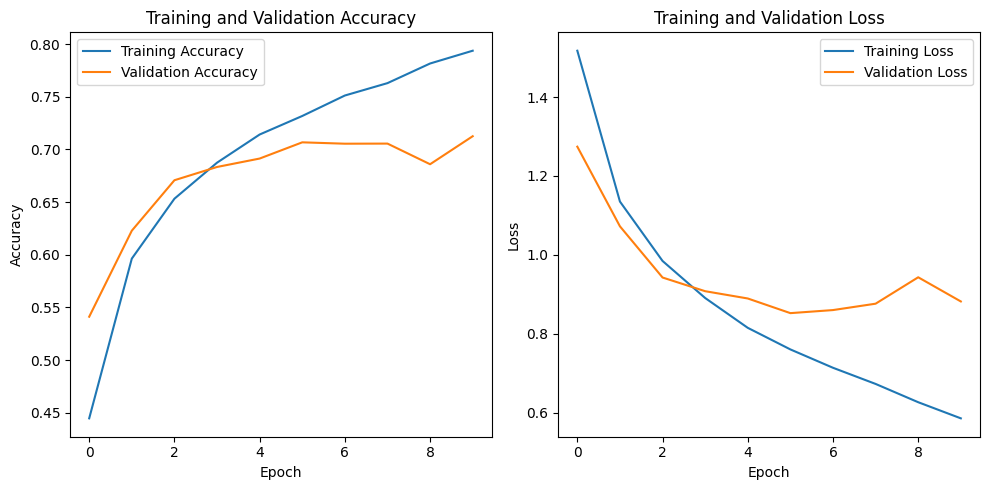

In [ ]:
import matplotlib.pyplot as plt

# Obtener la precisión y la pérdida del modelo en cada época
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear gráficos
plt.figure(figsize=(10, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()


* Gráfico de precisión: Muestra cómo la precisión del modelo en los datos de entrenamiento y validación cambia a lo largo de las épocas.
* Gráfico de pérdida: Muestra cómo la pérdida del modelo en los datos de entrenamiento y validación cambia a lo largo de las épocas.

# Otro ejemplo

En este ejemplo, utilizaremos la biblioteca TensorFlow y Keras para construir una arquitectura de red más avanzada. Hemos construido una arquitectura de red más profunda que incluye capas de Batch Normalization y Dropout para regularización. También hemos agregado una devolución de llamada de Early Stopping para detener el entrenamiento temprano si la precisión en el conjunto de validación deja de mejorar después de un número determinado de épocas (en este caso, 5).


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, callbacks

# Cargar y preparar el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir la arquitectura de la red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10)
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Definir devolución de llamada para detener el entrenamiento temprano si la precisión en la validación deja de mejorar
early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest accuracy:", test_acc)


# Ejercicio:

Descripción: el objetivo de este ejercicio es explorar cómo diferentes hiperparámetros afectan el rendimiento de una red neuronal convolucional en la clasificación de imágenes del conjunto de datos CIFAR-10. Deberás ajustar y comparar al menos dos de los siguientes hiperparámetros:

* Tasa de aprendizaje.
* Número de épocas de entrenamiento.
* Tamaño del lote (batch size).
* Tamaño de los filtros convolucionales.
* Número de filtros convolucionales en cada capa.
* Tamaño de las capas totalmente conectadas.
* Técnicas de regularización como Dropout o Batch Normalization.

**Instrucciones**

* Carga el conjunto de datos CIFAR-10 y prepáralo para su uso en el entrenamiento y la evaluación del modelo.

* Define una arquitectura base para la red neuronal convolucional.

* Crea varias versiones de la arquitectura base, variando al menos dos de los hiperparámetros mencionados anteriormente en cada versión.

* Entrena cada versión de la red neuronal utilizando los datos de entrenamiento y evalúala utilizando los datos de prueba.

* Registra y compara la precisión de cada versión de la red neuronal en un gráfico o tabla.

* Analiza y discute los resultados obtenidos, observando cómo diferentes configuraciones de hiperparámetros afectan el rendimiento del modelo en la clasificación de imágenes CIFAR-10.